In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000
b = np.ones(N)
x_0 = np.random.normal(0,1, N)

X = np.c_[b, x_0]

## enter 
theta = np.array([1,5])

# calculate y
## Xtheta = 
y = X.dot(theta)
print(len(y))

100000


In [59]:
def gradient_descent(X, y, num_it, lr, batch_size):
  
  # initial weights
  theta_hat = np.random.normal(0,10,2)
  
  # lists to store learning process
  log, theta_0, theta_1, mse = [], [], [], []
  
  for i in range(0,num_it): 
    # batch_size
    idx = np.random.randint(0, len(X), batch_size)
    Xs = X[idx]
    ys = y[idx]
    n = len(X)

    # predict y
    y_hat = Xs.dot(theta_hat)

    # gradient of e'e w.r.t. theta_hat = (y - y_hat)^2 = gradient of y'y-2*theta_hat'X'y + theta_hat'X'Xtheta_hat w.r.t theta_hat =   
    gradient_w = (-2 * Xs.T.dot(ys) + 2*Xs.T.dot(y_hat))
    
    # weight update
    theta_hat = theta_hat - lr * gradient_w
    
    log.append(theta_hat)
    theta_0.append(theta_hat[0])
    theta_1.append(theta_hat[1])
    loss = (y_hat - ys).sum()**2
    mse.append(loss)
    print(i," MSE =", np.round((loss).sum()**2,8), "and theta =", np.round_(theta_hat,1), "and gradient =", np.round(gradient_w,0)) 
  return theta_hat, log, mse, theta_0, theta_1

theta_hat, log, mse, theta_0, theta_1 = gradient_descent(X = X, y = y, num_it = 25, lr = 1e-2, batch_size = 10)

print("analytical solution for theta vector = ", np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)))

0  MSE = 147372244.60317925 and theta = [-2.7 -8.1] and gradient = [-220. -392.]
1  MSE = 78549324.82837035 and theta = [-0.9 -4.6] and gradient = [-188. -345.]
2  MSE = 0.87269475 and theta = [-0.8 -3. ] and gradient = [  -2. -158.]
3  MSE = 108353.88592332 and theta = [-1.2 -1.4] and gradient = [  36. -163.]
4  MSE = 2403944.02571616 and theta = [-0.4 -0.5] and gradient = [-79. -84.]
5  MSE = 224413.172349 and theta = [ 0.  -0.2] and gradient = [-44. -36.]
6  MSE = 36616.14227733 and theta = [-0.3  0.9] and gradient = [  28. -112.]
7  MSE = 96113.49201184 and theta = [0.1 1.8] and gradient = [-35. -82.]
8  MSE = 145.13322701 and theta = [0.  2.8] and gradient = [   7. -108.]
9  MSE = 41040.33013151 and theta = [0.3 3.3] and gradient = [-28. -44.]
10  MSE = 5999.08556723 and theta = [0.5 4. ] and gradient = [-18. -77.]
11  MSE = 1158.60547906 and theta = [0.6 4.2] and gradient = [-12. -19.]
12  MSE = 205.40829941 and theta = [0.7 4.3] and gradient = [-8. -9.]
13  MSE = 775.65795598 an

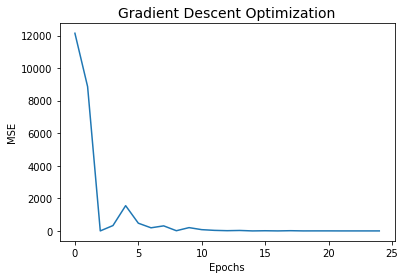

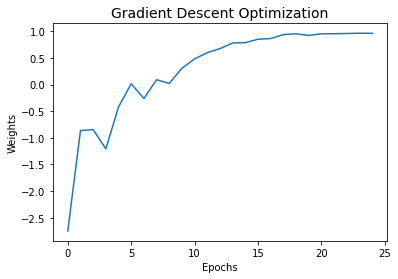

Mean Squared Error : 3.8951065107572276e-07


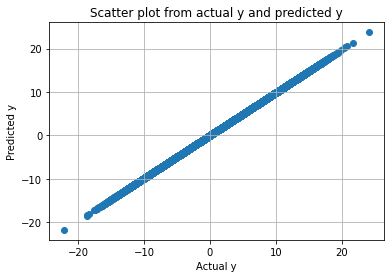

In [60]:
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(range(len(theta_0)), theta_0)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.show()

# predictions
y_pred = X.dot(theta_hat)

# plot predictions
plt.scatter(y, y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
print('Mean Squared Error :',(y - y_pred).sum()/N**2)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


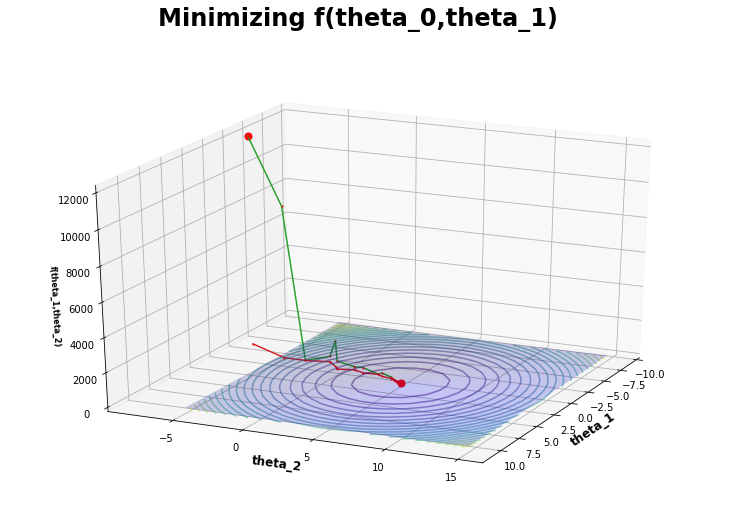

In [61]:
#Setup of meshgrid of theta values
ms = np.linspace(theta[0] - 10, theta[0] + 10, 20)
bs = np.linspace(theta[1] - 10 , theta[1] + 10, 20)
M, B = np.meshgrid(ms, bs)

def costfunction(X, y, theta_hat):
    return np.sum((X.dot(theta_hat) - y)**2)/(2*y.size)

#Computing the cost function for each theta combination
zs = np.array([costfunction(X, y, theta_hat) 
                     for theta_hat in zip(np.ravel(M), np.ravel(B))])
#Reshaping the cost values    
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('theta_1', labelpad=3, fontsize=12, fontweight='bold')
ax.set_ylabel('theta_2', labelpad=3, fontsize=12, fontweight='bold')
ax.set_zlabel('f(theta_1,theta_2)', fontsize=8, fontweight='bold')
ax.view_init(elev=25, azim=25)
ax.plot([theta[0]], [theta[1]], [mse[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([log[0][0]], [log[0][1]], [mse[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in log], [t[1] for t in log], mse , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in log], [t[1] for t in log], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizing f(theta_0,theta_1)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")